# Homework 2

**Please type your name and A number here:**

In [141]:
Name = "Hari Chandana Kotnani"
assert Name != "", 'Please enter your name in the above quotation marks, thanks!'

A_number = "A02395874"
assert A_number != "", 'Please enter your A-number in the above quotation marks, thanks!'

In this homework, we will implement a logistic regression from scratch. Your jobs

1. Implement the objective function.

2. Implement the stochastic gradident descent algorithm to train the logistic regression.

3. Implement the mini-batch stochastic gradident descent algorithm to train the logistic regression.

4. Submit the .IPYNB file to Canvas.
    - Missing the output after execution may hurt your grade.


**In this homework, you are not allowed to import other packages, such as PyTorch. You need to write the plain numpy code to implement the algorithms and cannot use sklearn in your implementation.**

When computing the gradient and objective function value for GD and mini-batch SGD algorithms, use matrix-vector multiplication rather than a FOR LOOP of vector-vector multiplications.

In general, you can expect the following chart regarding the convergence of GD, SGD, and mini-batch SGD.

<img src="https://docs.google.com/uc?export=download&id=13QpAtDEiaZUbLSPLqzjZTsuCCtbRfnQz" alt="drawing" width="400"/>

**Bonus (15pt)**: add a regularization term to the objective function and train the model based on the new objective function.

# 1. Data processing

- Download the Diabete dataset from https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/diabetes
- Load the data using sklearn.
- Preprocess the data.

## 1.1. Load the data

In [142]:
from sklearn import datasets
from sklearn import preprocessing
import numpy as np
import math

x_sparse, y = datasets.load_svmlight_file('diabetes.txt')
x = x_sparse.toarray()
lb = preprocessing.LabelBinarizer()
y = lb.fit_transform(y).reshape(-1)
print('Shape of x: ' + str(x.shape))
print('Shape of y: ' + str(y.shape))

Shape of x: (768, 8)
Shape of y: (768,)


## 1.2. Partition to training and test sets

In [143]:
# partition the data to training and test sets
n = x.shape[0]
n_train = int(np.ceil(n * 0.8))
n_test = n - n_train

rand_indices = np.random.permutation(n)
train_indices = rand_indices[0:n_train]
test_indices = rand_indices[n_train:n]

x_train = x[train_indices, :]
x_test = x[test_indices, :]
y_train = y[train_indices]
y_test = y[test_indices]

print('Shape of x_train: ' + str(x_train.shape))
print('Shape of x_test: ' + str(x_test.shape))
print('Shape of y_train: ' + str(y_train.shape))
print('Shape of y_test: ' + str(y_test.shape))

Shape of x_train: (615, 8)
Shape of x_test: (153, 8)
Shape of y_train: (615,)
Shape of y_test: (153,)


## 1.3. Feature scaling

Min-max normalization and standardization are two popular feature scaling methods.

- Min-max normalization scales the features to the interval $[0, 1]$.
- Standardization makes the features have zero mean and unit variance.

In [144]:
# Min-Max Normalization
d = x.shape[1]
xmin = np.min(x, axis=0).reshape(1, d)
xmax = np.max(x, axis=0).reshape(1, d)
xnew = (x - xmin) / (xmax - xmin)

print(xnew)

print('max = ')
print(np.max(xnew, axis=0))

print('min = ')
print(np.min(xnew, axis=0))

[[0.35294118 0.74371859 0.59016393 ... 0.50074514 0.23441503 0.48333333]
 [0.05882353 0.42713568 0.54098361 ... 0.39642326 0.11656704 0.16666667]
 [0.47058824 0.91959799 0.52459016 ... 0.34724292 0.25362938 0.18333333]
 ...
 [0.29411765 0.6080402  0.59016393 ... 0.39046202 0.07130658 0.15      ]
 [0.05882353 0.63316583 0.49180328 ... 0.44858422 0.11571307 0.43333333]
 [0.05882353 0.46733668 0.57377049 ... 0.45305516 0.10119556 0.03333333]]
max = 
[1. 1. 1. 1. 1. 1. 1. 1.]
min = 
[0. 0. 0. 0. 0. 0. 0. 0.]


In [145]:
# Standardization

d = x.shape[1]
mu = np.mean(x, axis=0).reshape(1, d)
sig = np.std(x, axis=0).reshape(1, d)
xnew = (x - mu) / sig

print('xnew = ')
print(xnew)

print('mean = ')
print(np.mean(xnew, axis=0))

print('std = ')
print(np.std(xnew, axis=0))

xnew = 
[[ 0.63994726  0.84832379  0.14964075 ...  0.20401252  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325559  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518952 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212882 -0.47378505
  -0.87137393]]
mean = 
[-7.74843153e-17  3.61400724e-18 -1.32724416e-17  7.76288755e-17
 -5.49329101e-17  5.12683067e-15  1.92438658e-15  2.19297959e-16]
std = 
[1. 1. 1. 1. 1. 1. 1. 1.]


### In this homework, we use the standardization to trainsform both training and test features

In [146]:
# Standardization

# calculate mu and sig using the training set
d = x_train.shape[1]
mu = np.mean(x_train, axis=0).reshape(1, d)
sig = np.std(x_train, axis=0).reshape(1, d)

# transform the training features
x_train = (x_train - mu) / sig

# transform the test features
x_test = (x_test - mu) / sig


print('test mean = ')
print(np.mean(x_test, axis=0))

print('test std = ')
print(np.std(x_test, axis=0))

test mean = 
[-0.01728271  0.21518297  0.11572014  0.00615854 -0.09787213  0.00449861
 -0.06743849  0.01112509]
test std = 
[0.88225663 0.94605568 0.78874768 1.04421846 0.94337803 0.88991846
 1.14471327 0.96035844]


# 2. Logistic regression model
## Define the sigmoid function


In [147]:
def _sigmoid(z):
    # Sigmoid function can be used to calculate probability.
    # To avoid overflow, minimum/maximum output value is set.
    return np.clip(1 / (1.0 + np.exp(-z)), 1e-8, 1 - (1e-8))

def _f(X, w, b):
    # This is the logistic regression function, parameterized by w and b
    #
    # Arguements:
    #     X: input data, shape = [n or batch_size, data_dimension]
    #     w: weight vector, shape = [data_dimension, ]
    #     b: bias, scalar
    # Output:
    #     predicted probability of each row of X being positively labeled, shape = [n or batch_size, ]
    return _sigmoid(np.matmul(X, w) + b)

The objective function is $L(\mathbf{w}; \mathbf{X}, \mathbf{y})=\sum_{i=1}^n -[y_i \log \hat y_i + (1-y_i)\log (1-\hat y_i)]$, where $\hat y_i = \sigma (\mathbf{w}^T \mathbf{x}_i +b)$.

<font color='red'> **rubic={20 points}** </font> 

In [148]:
def _cross_entropy_loss(y_pred, Y_label):
    
    # This function computes the cross entropy.
    #
    # Arguements:
    #     y_pred: probabilistic predictions, float vector
    #     Y_label: ground truth labels,  vector
    # Output:
    #     cross entropy: scalar

    ## write your code here. You CANNOT use for loop here.
    
    cross_entropy = np.sum(-( Y_label * (np.log(y_pred)) + (1 - (Y_label)) * np.log(1 - (y_pred)) )) 
    
    return cross_entropy

In [149]:
# initialize w, b
d = x_train.shape[1]
w = np.zeros(d)
b = np.zeros(1)
# evaluate the objective function value at w
y_pred = _f(x_train, w, b)
objval0 = _cross_entropy_loss(y_pred, y_train)
print('Initial objective function value = ' + str(objval0))

Initial objective function value = 426.2855160443664


# 3. Numerical optimization

## 3.1. Calculate the full gradient

The gradient at $w$ is $g = \frac{1}{n} \sum_{i=1}^n [\sigma (\mathbf{w}^T \mathbf{x}_i + b)-y_i]\mathbf{x}_i$

In [150]:
# Calculate the gradient
# Inputs:
#     X: n-by-d matrix
#     Y_label: n-by-1 matrix
#     w: d-by-1 matrix
#     b: scalar
# Return:
#     w_grad: d-by-1 matrix, full gradient
#     b_grad: scalar
def _gradient(X, Y_label, w, b):
    # This function computes the gradient of cross entropy loss with respect to weight w and bias b.
    y_pred = _f(X, w, b)
    pred_error = y_pred - Y_label
    w_grad = np.mean(pred_error * X.T, 1)
    b_grad = np.mean(pred_error)
    return w_grad, b_grad

## 3.2. Gradient descent


In [151]:
# Gradient descent for solving logistic regression
# Inputs:
#     x_train: n-by-d matrix
#     y_train: n-by-1 matrix
#     stepsize: scalar
#     max_iter: integer, the maximal iterations
# Return:
#     w: d-by-1 matrix, the solution
#     b: scalr, the solution
#     objvals: a record of each epoch's objective value
def grad_descent(x_train, y_train, w, b, stepsize, max_iter=150):
    n, d = x_train.shape
    objvals = np.zeros(max_iter) # store the objective values
    
    for t in range(max_iter):
        y_pred = _f(x_train, w, b)
        objval = _cross_entropy_loss(y_pred, y_train)
        objvals[t] = objval/n
        print('Objective value at t=' + str(t) + ' is ' + str(objval/n))
        w_grad, b_grad = _gradient(x_train, y_train, w, b)
        w -= stepsize * w_grad
        b -= stepsize * b_grad
    stepsize *= 0.9 # decrease step size
    
    return w, b, objvals

In [152]:
# example
d = x_train.shape[1]
w = np.zeros(d)
b = np.zeros(1)
stepsize = 0.2
w, b, objvals_gd = grad_descent(x_train, y_train, w, b, stepsize)

Objective value at t=0 is 0.6931471805599453
Objective value at t=1 is 0.6674933594562708
Objective value at t=2 is 0.6458192748474948
Objective value at t=3 is 0.6273974180422861
Objective value at t=4 is 0.6116290580131932
Objective value at t=5 is 0.598030898709449
Objective value at t=6 is 0.5862165577891675
Objective value at t=7 is 0.5758780441374336
Objective value at t=8 is 0.5667695067924607
Objective value at t=9 is 0.5586938801184572
Objective value at t=10 is 0.5514922838816346
Objective value at t=11 is 0.5450357604910695
Objective value at t=12 is 0.5392188873120096
Objective value at t=13 is 0.5339548502550142
Objective value at t=14 is 0.5291716394787829
Objective value at t=15 is 0.524809101184558
Objective value at t=16 is 0.5208166415695856
Objective value at t=17 is 0.517151428382305
Objective value at t=18 is 0.5137769734946603
Objective value at t=19 is 0.5106620086044198
Objective value at t=20 is 0.5077795876840351
Objective value at t=21 is 0.5051063658547315
O

## 3.3. Stochastic gradient descent (SGD)

Define $L_i(\mathbf{w}; \mathbf{x}, y)= -[y_i \log \hat y_i + (1-y_i)\log (1-\hat y_i)]$, where $\hat y_i = \sigma (\mathbf{w}^T \mathbf{x}_i +b)$.

The stochastic gradient at $w$ is $g_i = \frac{\partial L_i }{ \partial w} = [\sigma (\mathbf{w}^T \mathbf{x}_i + b)-y_i]\mathbf{x}_i$.

<font color='red'> **rubic={30 points}** </font> 

In [153]:
# Calculate the objective L_i and the gradient of L_i
# Inputs (you can revise the inputs of this function):
#     xi: 1-by-d matrix
#     yi: scalar
#     w: d-by-1 matrix
#     b: scalar
# Return:
#     w_grad: d-by-1 matrix, gradient of L_i with respect to w
#     b_grad: scalr, gradient of L_i with respect to b
def stochastic_objective_gradient(xi, yi, w, b):
    y_pred = _f(xi, w, b)
    pred_error = y_pred - yi
    w_grad = np.asarray(pred_error * xi.T)
    b_grad = pred_error

    return w_grad, b_grad

In [154]:
# SGD for solving logistic regression
# Inputs:
#     x_train: n-by-d matrix
#     y_train: n-by-1 matrix
#     w: d-by-1 matrix, initialization of w
#     b: scalr, initialization of b
#     stepsize: scalar
#     max_epoch: integer, the maximal epochs
# Return:
#     w: the solution
#     b: the solution
#     objvals: record of each epoch's objective value
def sgd(x_train, y_train, w, b, stepsize, max_epoch=150):
    n, d = x_train.shape
    objvals = np.zeros(max_epoch) # store the objective values
    for t in range(max_epoch):
        # randomly shuffle the samples
        rand_indices = np.random.permutation(n)
        x_rand = x_train[rand_indices, :]
        y_rand = y_train[rand_indices]
        
        objval = 0 # accumulate the objective values
        for i in range(n):
            xi = x_rand[i, :] # 1-by-d matrix
            yi = float(y_rand[i]) # scalar
            y_pred = _f(xi, w, b)
            obj = float(_cross_entropy_loss(y_pred, yi))
            w_grad, b_grad = stochastic_objective_gradient(xi, yi, w, b)
            objval += obj
            w -= stepsize * w_grad
            b -= stepsize * b_grad
        
        stepsize *= 0.9 # decrease step size
        objvals[t] = objval/n
        print('Objective value at epoch t=' + str(t) + ' is ' + str(objval/n))
    
    return w, b, objvals

In [155]:
# example
# initialize w, b
d = x_train.shape[1]
w = np.zeros(d)
b = np.zeros(1)
stepsize = 0.2
w, b, objvals_sgd = sgd(x_train, y_train, w, b, stepsize)

Objective value at epoch t=0 is 0.5655778159751734
Objective value at epoch t=1 is 0.5372056510237724
Objective value at epoch t=2 is 0.5479375407432525
Objective value at epoch t=3 is 0.5260003825464782
Objective value at epoch t=4 is 0.518071646545653
Objective value at epoch t=5 is 0.5104025225358542
Objective value at epoch t=6 is 0.508208741619286
Objective value at epoch t=7 is 0.5119798589677133
Objective value at epoch t=8 is 0.4974004801824455
Objective value at epoch t=9 is 0.4946912958779277
Objective value at epoch t=10 is 0.48471146500869766
Objective value at epoch t=11 is 0.4830201980190446
Objective value at epoch t=12 is 0.4868150722564176
Objective value at epoch t=13 is 0.4790236472727782
Objective value at epoch t=14 is 0.48341184764290085
Objective value at epoch t=15 is 0.4764972722473233
Objective value at epoch t=16 is 0.47445478956645043
Objective value at epoch t=17 is 0.477437891232908
Objective value at epoch t=18 is 0.476202372345
Objective value at epoch t

## 3.3. Mini-batch SGD

Define $L_I(\mathbf{w}; \mathbf{X}, \mathbf{y})= \sum_{i \in I} -[y_i \log \hat y_i + (1-y_i)\log (1-\hat y_i)]$, where $\hat y_i = \sigma (\mathbf{w}^T \mathbf{x}_i +b)$, and $I$ is a set containing $b$ indices randomly drawn from $\{ 1, \cdots , n \}$ without replacement.



The stochastic gradient at $w$ is $g_I =  \sum_{i \in I} [\sigma (\mathbf{w}^T \mathbf{x}_i + b)-y_i]\mathbf{x}_i$.

<font color='red'> **rubic={50 points}** </font> 

In [156]:
# mini_batch_SGD for solving logistic regression
# Inputs:
#     x_train: n-by-d matrix
#     y_train: n-by-1 matrix
#     w: d-by-1 matrix, initialization of w
#     b: scalar, initialization of b
#     stepsize: scalar
#     batch_size: integer, the number of batch size
#     max_epoch: integer, the maximal epochs
# Return:
#     w: the solution
#     b: the solution
#     objvals: record of each epoch's objective value
import numpy
def epoch(s, a, l):
    idxArray = [i for i in range(len(a))]
    numpy.random.shuffle(idxArray)
    return [[a[numpy.array(idxArray[i: min(i + s, len(a))])], l[numpy.array(idxArray[i: min(i + s, len(a))])]]  for i in range(0,len(a), s)]
    
    
def mini_batch_sgd(x_train, y_train, w, b, stepsize, batch_size=32, max_epoch=150):
    n, d = x_train.shape
    objvals = np.zeros(max_epoch)
    
    for t in range(max_epoch):
      objval = 0 

      ## write your code here
      for X, Y in epoch(batch_size, x_train, y_train):
          y_pred = _f(X, w, b)
          DG, GG = _gradient(X, Y, w, b)
          objval += _cross_entropy_loss(y_pred, Y)
          w = w - stepsize * DG
          b = b - stepsize * GG
        
      stepsize *= 0.9 
      objvals[t] = objval/n
      print('Objective value at epoch t=' + str(t) + ' is ' + str(objval/n))
    
    return w, b, objvals

In [157]:
# example
d = x_train.shape[1]
w = np.zeros(d)
b = np.zeros(1)
stepsize = 0.2
w, b, objvals_mini_sgd = mini_batch_sgd(x_train, y_train, w, b, stepsize)

Objective value at epoch t=0 is 0.5775974352263152
Objective value at epoch t=1 is 0.49491102151260596
Objective value at epoch t=2 is 0.4760571579931024
Objective value at epoch t=3 is 0.4693481828469736
Objective value at epoch t=4 is 0.4645570412555208
Objective value at epoch t=5 is 0.46279143131321343
Objective value at epoch t=6 is 0.46125268929698726
Objective value at epoch t=7 is 0.4612293095928867
Objective value at epoch t=8 is 0.4602783393942902
Objective value at epoch t=9 is 0.4600457399069862
Objective value at epoch t=10 is 0.45959002447185304
Objective value at epoch t=11 is 0.459554459340907
Objective value at epoch t=12 is 0.4596704394411856
Objective value at epoch t=13 is 0.45896271107218695
Objective value at epoch t=14 is 0.45904525007542973
Objective value at epoch t=15 is 0.45893656838294306
Objective value at epoch t=16 is 0.4588143607533298
Objective value at epoch t=17 is 0.4585848855009432
Objective value at epoch t=18 is 0.45858416579606454
Objective value

### Compare GD, SGD, and mini batch SGD

Plot objective function values against epochs.

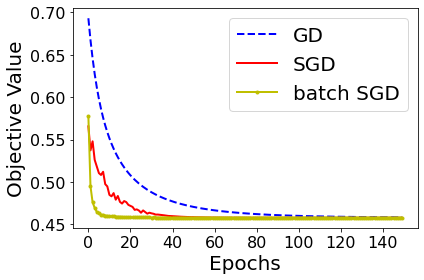

In [158]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(6, 4))

epochs_gd = range(len(objvals_gd))
epochs_sgd = range(len(objvals_sgd))
epochs_mini_sgd = range(len(objvals_mini_sgd))

line0, = plt.plot(epochs_gd, objvals_gd, '--b', LineWidth=2)
line1, = plt.plot(epochs_sgd, objvals_sgd, '-r', LineWidth=2)
line2, = plt.plot(epochs_mini_sgd, objvals_mini_sgd, '.-y', LineWidth=2)
plt.xlabel('Epochs', FontSize=20)
plt.ylabel('Objective Value', FontSize=20)
plt.xticks(FontSize=16)
plt.yticks(FontSize=16)
plt.legend([line0, line1, line2], ['GD', 'SGD', 'batch SGD'], fontsize=20)
plt.tight_layout()
plt.show()
fig.savefig('compare_gd_sgd.pdf', format='pdf', dpi=1200)

# 4. Prediction

In [159]:
# Predict class label
# Inputs:
#     w: d-by-1 matrix
#     X: m-by-d matrix
# Return:
#     f: m-by-1 matrix, the predictions
def predict(w, X):
    xw = np.dot(X, w)
    f = np.sign(xw)
    return f

In [160]:
# evaluate training error
f_train = predict(w, x_train)
diff = np.abs(f_train - y_train) / 2
error_train = np.mean(diff)
print('Training classification error is ' + str(error_train))

Training classification error is 0.375609756097561


In [161]:
# evaluate test error
f_test = predict(w, x_test)
diff = np.abs(f_test - y_test) / 2
error_test = np.mean(diff)
print('Test classification error is ' + str(error_test))

Test classification error is 0.37254901960784315


**BONUS**

In [162]:
def _gradient_reg(X, Y_label, w, b, i, batch_size, l):
    y_pred = _f(X, w, b)
    pred_error = y_pred - Y_label
    if i == 0:
        w_grad = np.mean(pred_error)
    else:
        w_grad = np.mean(pred_error * X.T, 1) + (1*w/batch_size)
    b_grad = np.mean(pred_error)
    return w_grad, b_grad

import random
def epoch(s, a, l):
    idxArray = [i for i in range(len(a))]
    numpy.random.shuffle(idxArray)
    return [[a[numpy.array(idxArray[i: min(i + s, len(a))])], l[numpy.array(idxArray[i: min(i + s, len(a))])]]  for i in range(0,len(a), s)]

    def mini_batch_sgd(x_train, y_train, w, b, stepsize, batch_size=32, max_epoch=150):
         n, d = x_train.shape
    objvals = np.zeros(max_epoch)
    
    for t in range(max_epoch):
      objval = 0 

      ## write your code here
      for X, Y in epoch(batch_size, x_train, y_train):
          y_pred = _f(X, w, b)
          DG, GG = _gradient(X, Y, w, b)
          objval += _cross_entropy_loss(y_pred, Y)
          w = w - stepsize * DG
          b = b - stepsize * GG
        
      stepsize *= 0.9 
      objvals[t] = objval/n
      print('Objective value at epoch t=' + str(t) + ' is ' + str(objval/n))
    
    return w, b, objvals



## Submission instructions 

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`.
2. Notebooks with cell execution numbers out of order will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Please keep your notebook clean and remove any throwaway code.